<a href="https://colab.research.google.com/github/AleFax99/DeepLearning_GroupProject/blob/main/DL_Assignment_baseline_2__IN_USE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset

You can download the dataset from {https://darwin.v7labs.com/v7-labs/covid-19-chest-x-ray-dataset?sort=priority\%3Adesc}.
The data entitled as '`darwin dataset pull v7-labs/covid-19-chest-x-ray-dataset:all-images`' will be used in this assignment. All dataset consist of 6504 images from 702 classes. We will extract the images of 4 classes (Bacterial Pneumonia, Viral Pneumonia, No Pneumonia (healthy), Covid-19) and save them as .npy file with the following code:

In [1]:
#Helloo 
# hellooooo


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Deep Learning/Deep Learning - Group Project
!pwd

/content/drive/MyDrive/Deep Learning/Deep Learning - Group Project
/content/drive/MyDrive/Deep Learning/Deep Learning - Group Project


In [4]:
# import json
# import numpy as np
# import glob
# import pandas as pd

# # importing modules
# import urllib.request
# from PIL import Image
# from keras import layers, models


In [5]:
# import json
# import numpy as np
# import glob
# import pandas as pd

# # importing modules
# import urllib.request
# from PIL import Image
# from keras import layers, models
# import tensorflow as tf

# # all-images file should be uploaded to the same file
# imageNames = glob.glob("./all-images/*")
# print(type(imageNames))
# print(len(imageNames))
# print(imageNames)

In [6]:

# import json
# import numpy as np
# import glob
# import pandas as pd

# # importing modules
# import urllib.request
# from PIL import Image
# from keras import layers, models
# import tensorflow as tf

# # all-images file should be uploaded to the same file
# imageNames = glob.glob("./all-images/*")

# dataset = []
# labels = []

# for i, imName in enumerate(imageNames):

#     # Opening JSON file
#     f = open(imName)
#     data = json.load(f)
#     for j in range(len(data['annotations'])):

#         if 'COVID-19' in (data['annotations'][j]['name']):
#           #load images from url    
#             urllib.request.urlretrieve(data['image']['url'],"img.png")    
#             img = Image.open("img.png")
#             #convert images to grayscale
#             imgGray = img.convert('L')
#             #resize the image (156x156)
#             im = imgGray.resize((156,156), Image.LANCZOS)           
#             label = data['annotations'][j]['name']
#             dataset.append(np.array(im))
#             labels.append(label)
#             print(label)
#             break

#         if 'Viral Pneumonia' in (data['annotations'][j]['name']) \
#             or 'Bacterial Pneumonia' in (data['annotations'][j]['name']) \
#             or 'No Pneumonia (healthy)' in (data['annotations'][j]['name']):
#             #load images from url    
#             urllib.request.urlretrieve(data['image']['url'],"img.png")    
#             img = Image.open("img.png")
#             #convert images to grayscale
#             imgGray = img.convert('L')
#             #resize the image (156x156)
#             im = imgGray.resize((156,156), Image.LANCZOS)           
#             label = data['annotations'][j]['name']
#             dataset.append(np.array(im))
#             labels.append(label)
#             break

# #Convert data shape of (n_of_samples, width, height, 1)
# dataset = np.dstack(dataset)    
# dataset = np.rollaxis(dataset,-1)
# labels = np.array(labels)

# #convert images gray scale to rgb
# data = np.array(layers.Lambda(tf.image.grayscale_to_rgb)(tf.expand_dims(dataset, -1)))

# # save data and labels into a folder
# np.save("./data.npy", data)
# np.save("./labels.npy", labels)

Once you save your data, you can load it from your directory.

In [7]:
import numpy as np

data = np.load('./data.npy')
labels = np.load('./labels.npy')

# Preprocessing Steps



## Splitting Data

In [8]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, test_size= 0.2, stratify= labels, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size= 0.25, stratify= y_train_val , random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)


(3840, 156, 156, 3) (1280, 156, 156, 3) (1281, 156, 156, 3)


## Normalize Data

In [9]:
# from skimage import io, color
# import matplotlib.pyplot as plt
# %matplotlib inline
# from skimage.filters import threshold_otsu

# data_list = []
# for im in X_train: 
# # read image from disk, provide the correct path 
# # convert to float
#   im = im.astype(float)                
# # normarlize the intensity values a range between 0 and 1
#   im = im-im.min()                    
#   im = im/im.max()
#   data_list.append(im)

# normalize to range 0-1
# Note: minimum = 0, maximum = 255.0
# Formula: (value - minimum) / (maximum - minimum)
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [10]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3840, 156, 156, 3)
(1280, 156, 156, 3)
(1281, 156, 156, 3)


In [11]:
type(y_train)

numpy.ndarray

In [12]:
y_train.shape

(3840,)

In [13]:
y_train

array(['Bacterial Pneumonia', 'Bacterial Pneumonia',
       'Bacterial Pneumonia', ..., 'Bacterial Pneumonia',
       'Bacterial Pneumonia', 'Bacterial Pneumonia'], dtype='<U22')

In [14]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# y_train_enc = enc.fit_transform(y_train)

# print(y_train_enc[0])

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

# from sklearn.preprocessing import LabelBinarizer
# label_binarizer = LabelBinarizer().fit(y_train)
# y_onehot_val = label_binarizer.transform(y_val)
# y_onehot_test = label_binarizer.transform(y_test)
# y_onehot_test.shape  # (n_samples, n_classes)

In [15]:
le.classes_

array(['Bacterial Pneumonia', 'COVID-19', 'No Pneumonia (healthy)',
       'Viral Pneumonia'], dtype='<U22')

In [16]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [18]:
y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

# Create Baseline Model

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

def build_model(optimizer='adam'): # which inputs should we have?
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape = (156,156,3), padding="same"))
  model.add(layers.Conv2D(32, (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Conv2D(64, (3,3), activation='relu', padding="same"))
  model.add(layers.Conv2D(32, (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(4, activation="softmax"))

  model.compile(optimizer= optimizer, 
                         loss=tf.keras.losses.CategoricalCrossentropy(),
                         metrics=['accuracy']
                         )
  return model


In [20]:
# model.build()
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 156, 156, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 156, 156, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 78, 78, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 78, 78, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                    

In [21]:
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.CategoricalCrossentropy(),
#     metrics=['accuracy']
# )
original_hist = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val), 
    verbose=0
)
history_dict = original_hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Analyze the performance of the baseline model

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test) # 0.7377

41/41 [==============================] - 1s 22ms/step - loss: 0.8593 - accuracy: 0.7377


# Plots

## Training and validation losses and accuracies on the training and validation set

In [23]:

import matplotlib.pyplot as plt

def plot_history(data_list, label_list, title, ylabel):
    ''' Plots a list of vectors.
    Parameters:
        data_list  : list of vectors containing the values to plot
        label_list : list of labels describing the data, one per vector
        title      : title of the plot
        ylabel     : label for the y axis
    '''
    epochs = range(1, len(data_list[0]) + 1)
    for data, label in zip(data_list, label_list):
        plt.plot(epochs, data, label=label)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

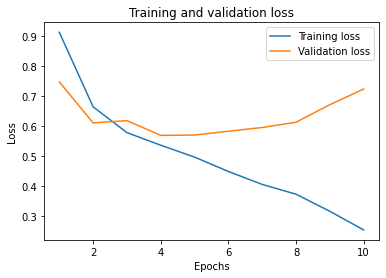

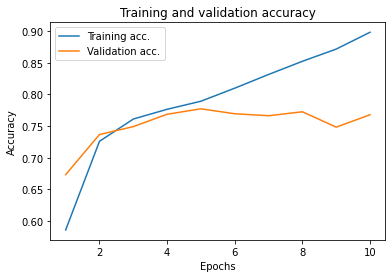

In [24]:
%matplotlib inline

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

## Receiver Operator Characteristic (ROC) curve with the Area under the Curve (AUC) score

Preprocessing:

In [ ]:
class_of_interest = "COVID-19"
class_id = np.flatnonzero(le.classes_ == class_of_interest)[0]
class_id

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

In [ ]:
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(len(le.classes_)):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= len(le.classes_)

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

In [ ]:
from itertools import cycle
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(len(le.classes_)), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {le.classes_[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

## Confusion matrix for the validation and test set

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

labels = le.classes_ 
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

# cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# print(cm)
# acc = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# print('test_accuracy: %.3f' % (acc))

# Adapting/fine-tuning the network

# Transfer Learning